Usamos la pagina de kaggle para descargar una base de datos de las accionesde uber: https://www.kaggle.com/datasets

In [20]:
import pandas as pd
df = pd.read_csv("UBER.csv")
df1 = df.tail(100) 
print( "General information about data set")
print(df.shape)
print(df.tail())
print(df.info())

df["Date"] = pd.to_datetime(df["Date"])
df['Day_of_Week'] = df['Date'].dt.day_name()
print(df.head())
# Calcular el promedio del precio más alto por día
day_price = df.groupby('Day_of_Week')['High'].mean().sort_values(ascending=False)

print("Precio promedio más alto por día:")
print(day_price)

# Encontrar el día con el precio más alto
max_day = day_price.idxmax()
max_price = day_price.max()

print(f"\nEl día más caro (en promedio) es {max_day} con un precio de {max_price:.2f}")

max_row = df.loc[df['High'].idxmax()]
print("\nDía más caro y hora exacta (de cotización):")
print(max_row[['Date', 'High']])

General information about data set
(725, 7)
           Date       Open       High        Low      Close  Adj Close  \
720  2022-03-18  32.520000  33.419998  32.330002  33.360001  33.360001   
721  2022-03-21  32.820000  32.820000  31.250000  31.980000  31.980000   
722  2022-03-22  31.930000  33.599998  31.840000  33.349998  33.349998   
723  2022-03-23  32.709999  33.680000  32.570000  33.060001  33.060001   
724  2022-03-24  34.740002  34.950001  33.439999  34.700001  34.700001   

       Volume  
720  35779700  
721  35200600  
722  21852800  
723  19024700  
724  52492200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       725 non-null    object 
 1   Open       725 non-null    float64
 2   High       725 non-null    float64
 3   Low        725 non-null    float64
 4   Close      725 non-null    float64
 5   Adj Close  725 non-null   

Exactitud promedio del modelo Entrenamiento 0.9968935038865392
Exactitud promedio del modelo de prueba 0.4418781302433493
RMSE: 3.8525


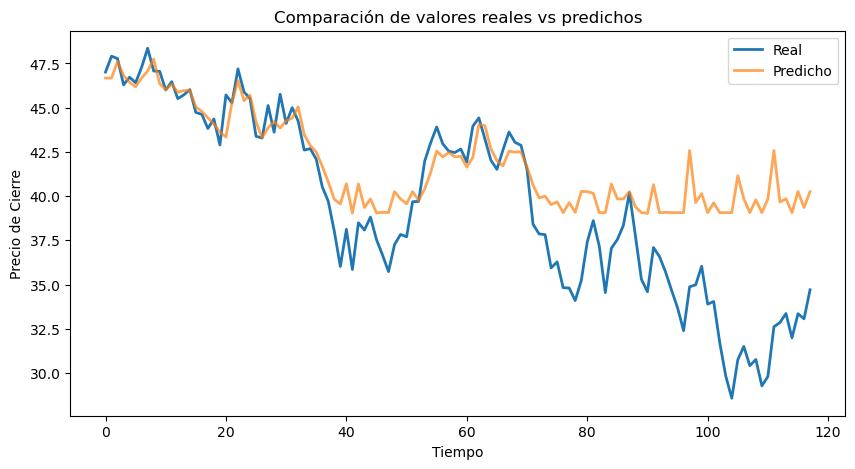

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Supón que ya cargaste df y creaste características
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
df['Lag1'] = df['Close'].shift(1)
df = df.dropna()

X = df[['Return', 'MA5', 'MA10', 'Lag1']]
y = df['Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print( "Exactitud promedio del modelo Entrenamiento " + str(model.score(X_train, y_train)) )
print("Exactitud promedio del modelo de prueba " + str(model.score(X_test, y_test)) )
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Real', linewidth=2)
plt.plot(y_pred, label='Predicho', linewidth=2, alpha=0.7)
plt.title('Comparación de valores reales vs predichos')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()



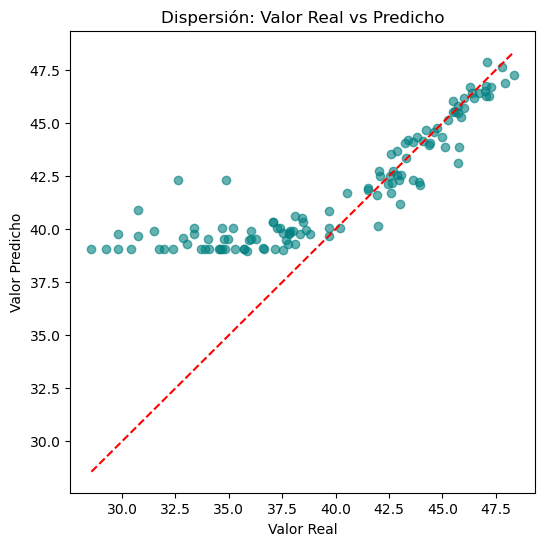

In [69]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.title('Dispersión: Valor Real vs Predicho')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.show()

🔹 Interpretación:

Los puntos cercanos a la línea roja son predicciones buenas.

Si hay puntos muy dispersos, el modelo tiene errores altos.

Te da una idea de si el modelo tiende a sobreestimar o subestimar.

In [4]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA5,MA10,Lag1
count,716,716.000000,716.000000,716.000000,716.000000,716.000000,7.160000e+02,716.000000,716.000000,716.000000,716.000000
mean,2020-10-22 18:36:12.067038976,40.159922,40.947500,39.256486,40.095796,40.095796,2.440256e+07,0.000435,40.117564,40.148120,40.104944
min,2019-05-23 00:00:00,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06,-0.216288,19.168000,21.603000,14.820000
25%,2020-02-06 18:00:00,32.709999,33.358751,31.887500,32.782500,32.782500,1.422965e+07,-0.019188,32.751499,32.510500,32.782500
50%,2020-10-21 12:00:00,38.885000,39.654999,37.750000,38.485001,38.485001,2.070380e+07,-0.000740,38.543000,38.980000,38.510000
75%,2021-07-09 18:00:00,46.747501,47.555000,45.930000,46.635001,46.635001,2.980862e+07,0.019151,46.639000,46.664750,46.635001
max,2022-03-24 00:00:00,63.250000,64.050003,60.799999,63.180000,63.180000,1.309657e+08,0.382591,61.170000,60.072000,63.180000
std,NaN,9.255176,9.314364,9.130350,9.196956,9.196956,1.571936e+07,0.037286,9.113555,9.016394,9.194839


Exactitud promedio del modelo Entrenamiento 1.0
Exactitud promedio del modelo de prueba 0.5107913669064749
RMSE: 0.6994
347


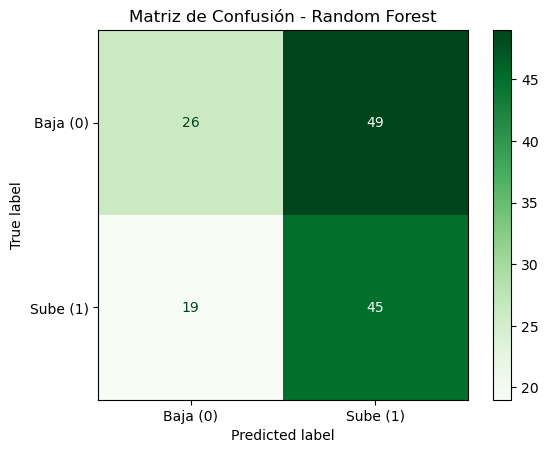

In [62]:
from sklearn.ensemble import RandomForestClassifier
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
count= df['target'].value_counts()


# Supón que ya cargaste df y creaste características
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
df['Lag1'] = df['Close'].shift(1)
df = df.dropna()

X = df[['Return', 'MA5', 'MA10', 'Lag1']]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print( "Exactitud promedio del modelo Entrenamiento " + str(forest.score(X_train, y_train)) )
print("Exactitud promedio del modelo de prueba " + str(forest.score(X_test, y_test)) )

y_pred = forest.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, forest.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Baja (0)', 'Sube (1)'])
disp.plot(cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

RandomForestClassifier = Se usa para predecir datos binarios, por lo que 
La idea era que el modelo aprendiera si el precio sube (1) o baja (0).
el test_size=0.4 lo que nos da un 20% para validación y 20% para testeo

Exactitud promedio del modelo nos da overfit porque tenemos el valor de Exactitud promedio del modelo Entrenamiento 1.0 . por eso la prediccion no es nada precisay el siguiente valor ronda porel 50%